# Policy Gradients (PG) Visualization Notebook

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

os.chdir('/home/mohsen/projects/cs285/hw2/')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = '150'

## CartPole-v0 Experiment

In [5]:
exp_path = 'data/'

In [6]:
!pwd

/home/mohsen/projects/cs285/hw2


In [7]:
best_models = [
    'q2_pg_q1_sb_no_rtg_dsa',
    'q2_pg_q1_sb_rtg_dsa',
    'q2_pg_q1_sb_rtg_na',
]

In [8]:
import numpy as np

In [30]:
df = None
for model in best_models:
    new_df = pd.read_csv(os.path.join(exp_path, model, 'progress.csv'))
    new_df['task'] = model
    new_df['Iteration'] = np.arange(len(new_df))
    if df is None:
        df = new_df.copy()
    else:
        df = pd.concat([df, new_df], axis=0)
        

In [31]:
import seaborn as sns

In [32]:
df.columns

Index(['Iteration', 'Eval_AverageReturn', 'Eval_StdReturn', 'Eval_MaxReturn',
       'Eval_MinReturn', 'Eval_AverageEpLen', 'Train_AverageReturn',
       'Train_StdReturn', 'Train_MaxReturn', 'Train_MinReturn',
       'Train_AverageEpLen', 'Train_EnvstepsSoFar', 'TimeSinceStart',
       'train_loss', 'Initial_DataCollection_AverageReturn', 'task'],
      dtype='object')

In [33]:
sns.set()

<Figure size 1500x750 with 0 Axes>

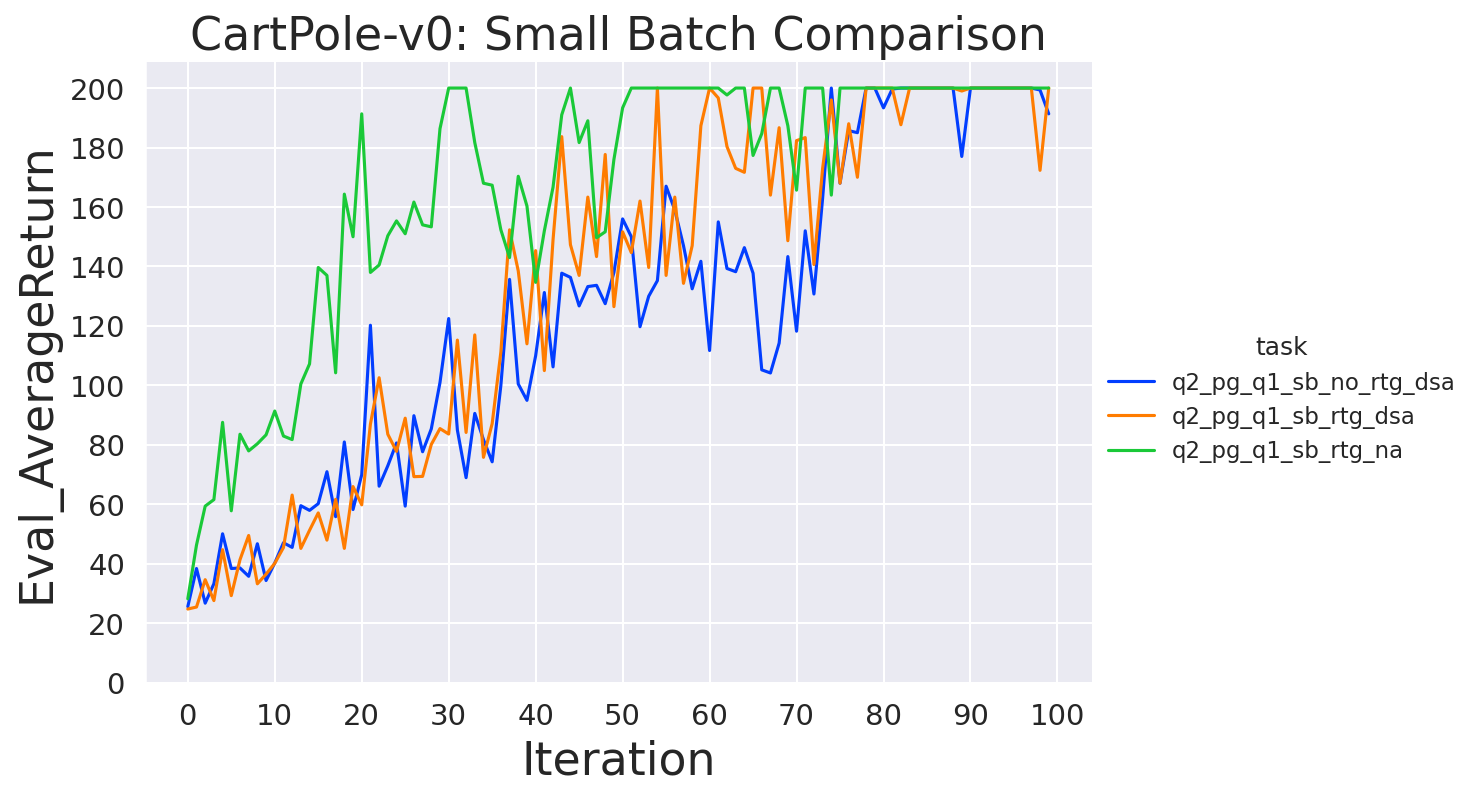

In [34]:
plt.figure(figsize=(10, 5))
sns.relplot(
    data=df, x="Iteration", y="Eval_AverageReturn", 
    hue="task", kind="line", height=5, aspect=1.5, palette='bright',
)
plt.xticks(np.arange(0, 110, 10), fontsize=14)
plt.yticks(np.arange(0, 220, 20), fontsize=14)
plt.xlabel('Iteration', fontsize=22)
plt.ylabel('Eval_AverageReturn', fontsize=22)
plt.title('CartPole-v0: Small Batch Comparison', fontsize=22)
plt.show()

<Figure size 1500x750 with 0 Axes>

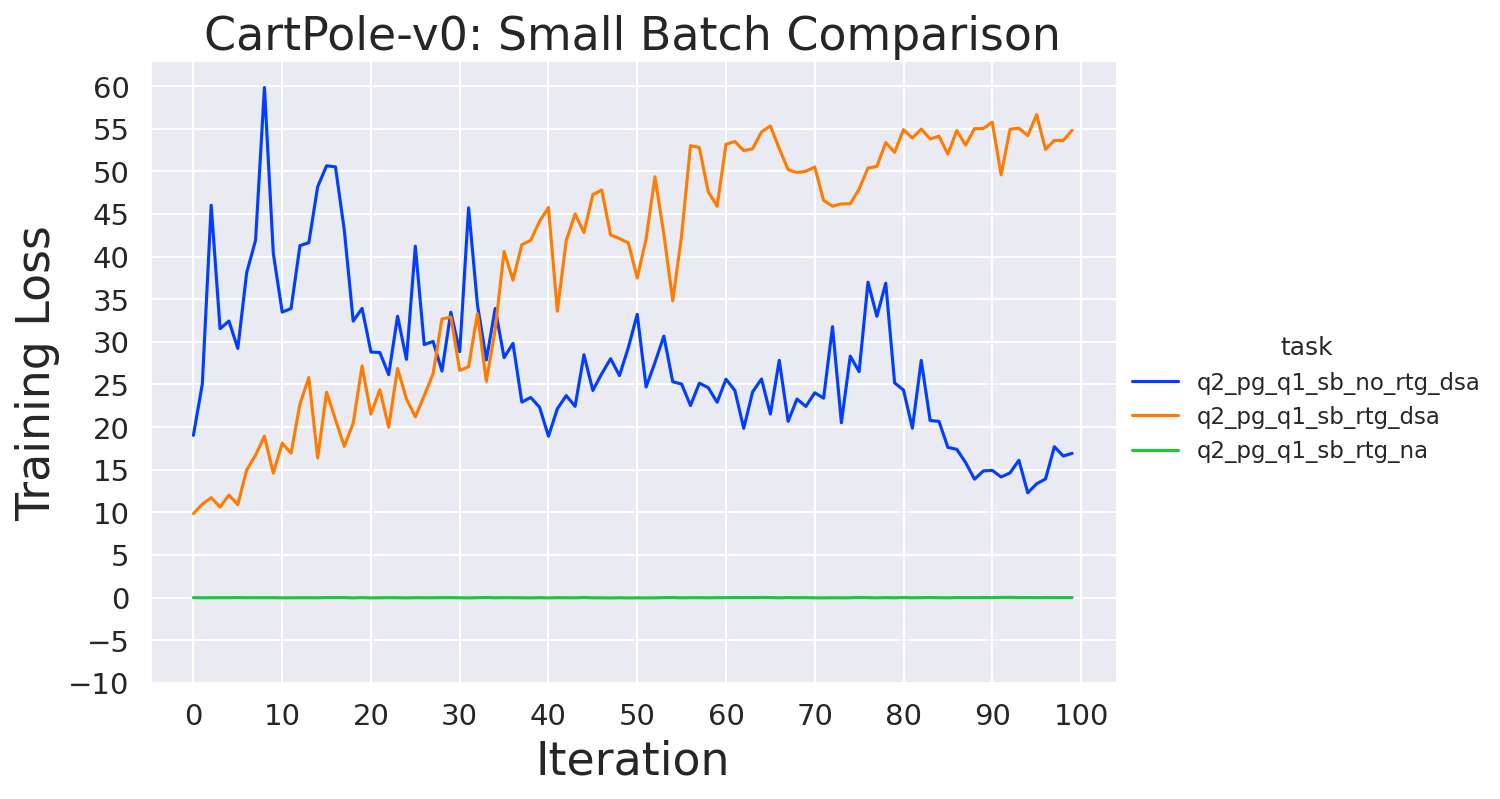

In [19]:
plt.figure(figsize=(10, 5))
sns.relplot(
    data=df, x="Iteration", y="train_loss", 
    hue="task", kind="line",height=5, aspect=1.5, palette='bright',
)
plt.xticks(np.arange(0, 110, 10), fontsize=14)
plt.yticks(np.arange(60, -15, -5), fontsize=14)
plt.xlabel('Iteration', fontsize=22)
plt.ylabel('Training Loss', fontsize=22)
plt.title('CartPole-v0: Small Batch Comparison', fontsize=22)
plt.show()

In [15]:
best_models = [
    'q2_pg_q1_lb_no_rtg_dsa',
    'q2_pg_q1_lb_rtg_dsa',
    'q2_pg_q1_lb_rtg_na',
]

In [16]:
df = None
for model in best_models:
    new_df = pd.read_csv(os.path.join(exp_path, model, 'progress.csv'))
    new_df['task'] = model
    new_df['Iteration'] = np.arange(len(new_df))
    if df is None:
        df = new_df.copy()
    else:
        df = pd.concat([df, new_df], axis=0)
        

<Figure size 1500x750 with 0 Axes>

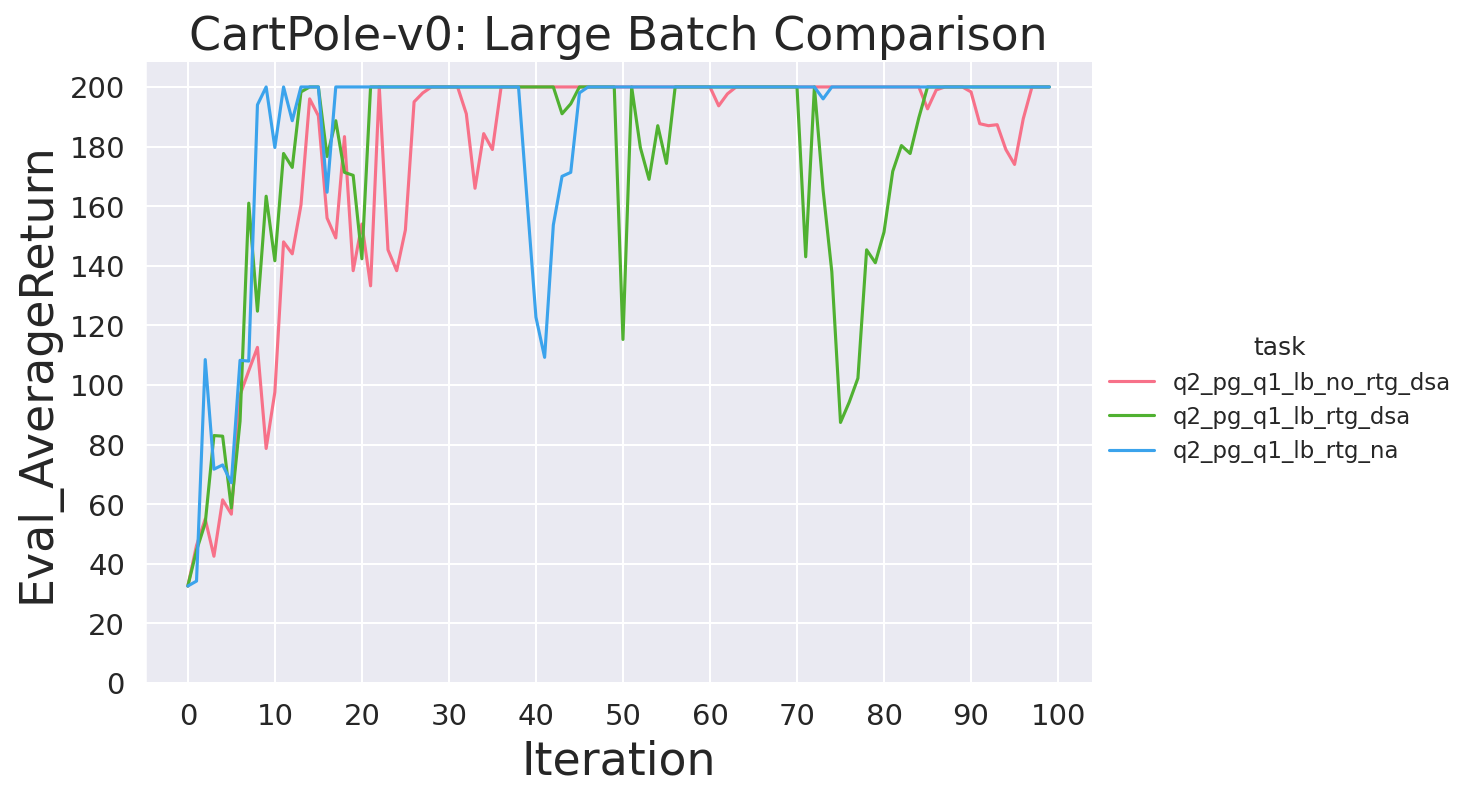

In [21]:
plt.figure(figsize=(10, 5))
sns.relplot(
    data=df, x="Iteration", y="Eval_AverageReturn", 
    hue="task", kind="line", height=5, aspect=1.5, palette='husl',
)
plt.xticks(np.arange(0, 110, 10), fontsize=14)
plt.yticks(np.arange(0, 220, 20), fontsize=14)
plt.xlabel('Iteration', fontsize=22)
plt.ylabel('Eval_AverageReturn', fontsize=22)
plt.title('CartPole-v0: Large Batch Comparison', fontsize=22)
plt.show()

<Figure size 1500x750 with 0 Axes>

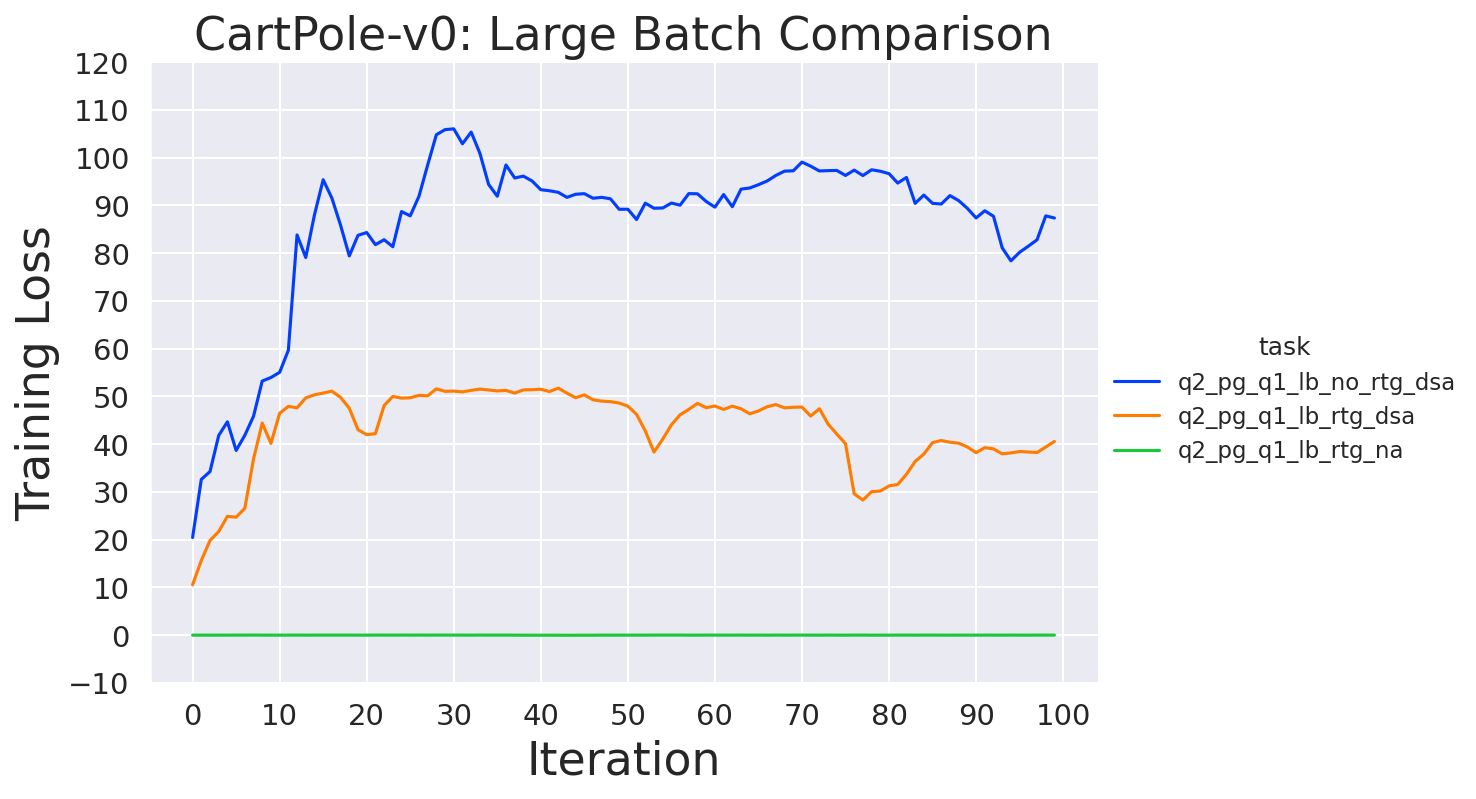

In [20]:
plt.figure(figsize=(10, 5))
sns.relplot(
    data=df, x="Iteration", y="train_loss", 
    hue="task", kind="line", height=5, aspect=1.5, palette='bright',
)
plt.xticks(np.arange(0, 110, 10), fontsize=14)
plt.yticks(np.arange(120, -15, -10), fontsize=14)
plt.xlabel('Iteration', fontsize=22)
plt.ylabel('Training Loss', fontsize=22)
plt.title('CartPole-v0: Large Batch Comparison', fontsize=22)
plt.show()

## InvertedPendulum-v4 Experiment

In [22]:
exp_path = './tune_exps'

In [23]:
experiments = [file for file in os.listdir(exp_path) if file.startswith('q2_pg_tune_q2_Inverted')]

In [24]:
len(experiments)

197

In [25]:
from tqdm import tqdm
import json

In [26]:
df = None
for experiment in tqdm(sorted(experiments)):
    try:
        progress_df = pd.read_csv(os.path.join(exp_path, experiment, 'progress.csv'))
        if len(progress_df) >= 1:
            # print(experiment)
            progress_df['id'] = experiment
            
            params = json.load(open(os.path.join(exp_path, experiment, 'hyper-params.json'), 'rb'))
            
            for key, value in params.items():
                if key not in ['agent_params', 'env_kwargs']:
                    progress_df[key] = value
                else:
                    for key2, value2 in params[key].items():
                        progress_df[key2] = value2
            
            if df is None:
                df = progress_df.copy()
            else:
                df = pd.concat([df, progress_df], axis=0)
        else:
            continue
    except Exception as e:
        continue
    

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 197/197 [00:02<00:00, 67.00it/s]


In [27]:
df.head()

,Iteration,Eval_AverageReturn,Eval_StdReturn,Eval_MaxReturn,Eval_MinReturn,Eval_AverageEpLen,Train_AverageReturn,Train_StdReturn,Train_MaxReturn,Train_MinReturn,...,save_params,seed,train_batch_size,logdir,gamma,standardize_advantages,discrete,ac_dim,ob_dim,batch_size_initial
0,0,19.318182,2.960135,26.0,15.0,19.318182,10.148149,5.917355,31.0,4.0,...,False,1454,256,/home/mohsen/projects/cs285/hw2/cs285/scripts/...,0.9,True,False,1,4,256
1,1,19.380953,4.735642,37.0,16.0,19.380952,20.230770,4.869905,29.0,15.0,...,False,1454,256,/home/mohsen/projects/cs285/hw2/cs285/scripts/...,0.9,True,False,1,4,256
2,2,19.333334,4.086369,29.0,15.0,19.333333,18.500000,3.438230,26.0,15.0,...,False,1454,256,/home/mohsen/projects/cs285/hw2/cs285/scripts/...,0.9,True,False,1,4,256
3,3,19.809525,2.921498,27.0,16.0,19.809524,19.500000,3.017804,26.0,16.0,...,False,1454,256,/home/mohsen/projects/cs285/hw2/cs285/scripts/...,0.9,True,False,1,4,256
4,4,10.225000,3.028923,16.0,6.0,10.225000,20.214285,5.016808,32.0,15.0,...,False,1454,256,/home/mohsen/projects/cs285/hw2/cs285/scripts/...,0.9,True,False,1,4,256


In [28]:
from matplotlib import pyplot as plt

In [29]:
sns.color_palette("RdYlBu_r", 11)

[(0.25674740484429065, 0.4152249134948097, 0.6844290657439447),
 (0.3898500576701269, 0.6009227220299886, 0.7794694348327567),
 (0.5648596693579393, 0.7663975394079201, 0.8675893886966551),
 (0.7398692810457518, 0.884967320261438, 0.9333333333333333),
 (0.8975009611687813, 0.960322952710496, 0.9374855824682813),
 (0.9999231064975009, 0.9976163014225298, 0.7454056132256824),
 (0.9966935793925413, 0.8975009611687812, 0.5936178392925797),
 (0.9934640522875817, 0.7477124183006536, 0.4418300653594771),
 (0.9734717416378317, 0.5474048442906574, 0.31810841983852367),
 (0.9167243367935409, 0.3430219146482122, 0.22399077277970011),
 (0.8085351787773933, 0.15501730103806227, 0.1522491349480969)]

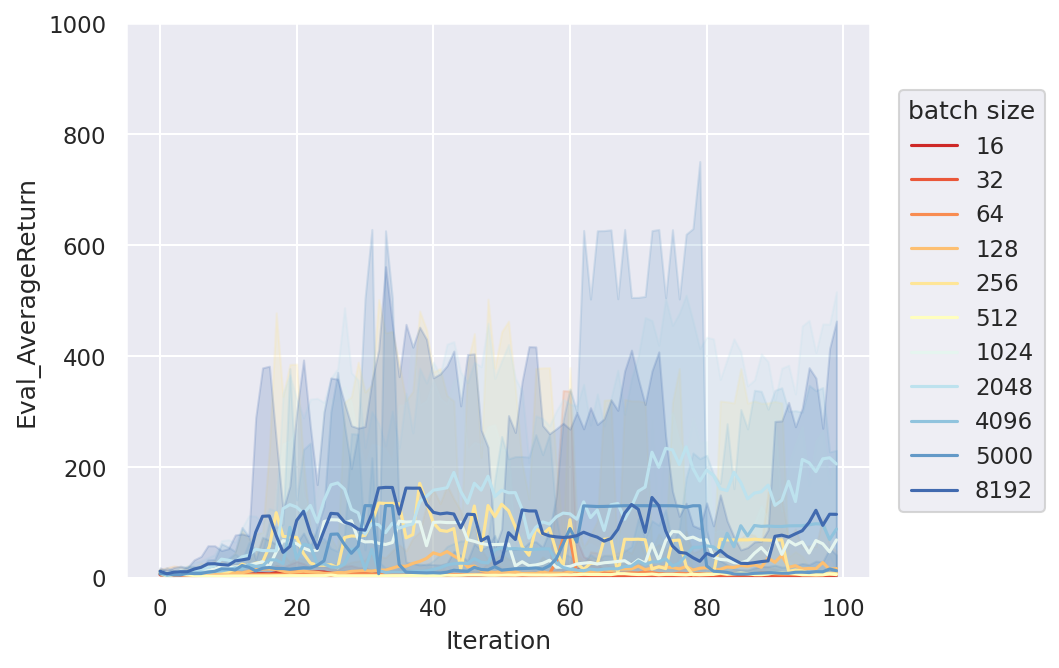

In [30]:
sns.lineplot(x='Iteration', y='Eval_AverageReturn', hue='batch_size', 
             data=df, palette=sns.color_palette("RdYlBu_r", 11)[::-1],
             errorbar=('ci', 100),
             markers=True, dashes=False)
plt.ylim(0, 1000)
plt.legend(bbox_to_anchor=(1.25, 0.90), title='batch size')
plt.show()

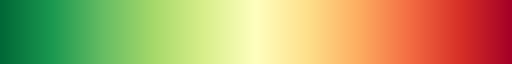

In [31]:
sns.color_palette("RdYlGn_r", as_cmap=True)

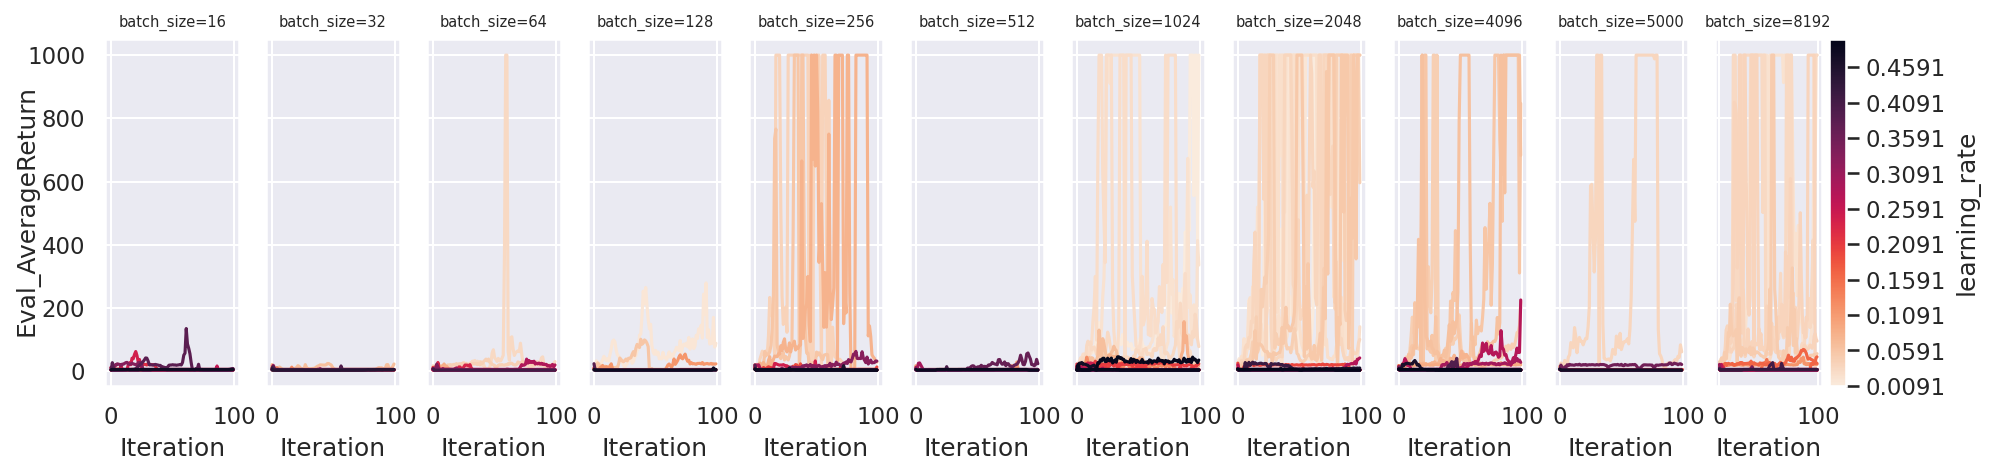

In [32]:
fig, ax = plt.subplots(1, len(df['batch_size'].unique()), sharey=True, sharex=False, figsize=(15, 3))
# fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(0.085, 0.5, 'Eval_AverageReturn', va='center', rotation='vertical')
for i, bs in enumerate(sorted(df['batch_size'].unique())):
    bs_df = df[df['batch_size'] == bs]
    norm = plt.Normalize(df['learning_rate'].min(), df['learning_rate'].max())
    sm = plt.cm.ScalarMappable(cmap="rocket_r", norm=norm)
    sm.set_array([])
    cmap = plt.get_cmap('rocket_r')
    g = sns.lineplot(x='Iteration', y='Eval_AverageReturn', hue='learning_rate', 
                     orient='x', data=bs_df, palette=cmap, 
                     hue_norm=norm, legend=False, ax=ax[i])
    g.set_ylabel('')
    g.set_title(f'batch_size={bs}', fontdict={'fontsize': 7})
    # g.add_legend()
    # g.ax.figure.colorbar(sm)
    ax[i].tick_params(axis='x', rotation=0)
cbar = ax[-1].figure.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap),
                              ticks=np.arange(df['learning_rate'].min(), df['learning_rate'].max(), 5e-2),
                              label='learning_rate')
    # cbar.ax.invert_yaxis()  # optionally invert the yaxis of the colorbar
    # ax.legend_.remove()  # for testing purposes don't yet remove the legend

# plt.tight_layout()
# plt.xlabel('Iteration', fontsize=22)
plt.show()

# plt.colorbar(fig)

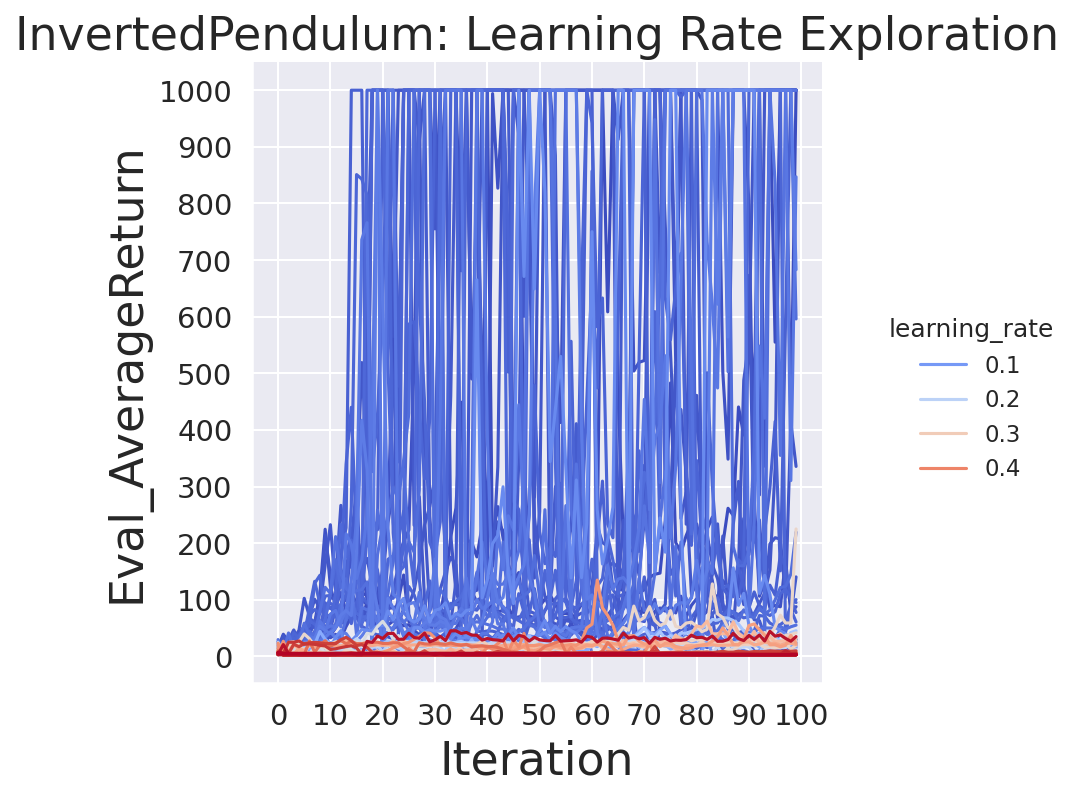

In [35]:
sns.relplot(x='Iteration', y='Eval_AverageReturn', hue='learning_rate', 
            kind='line', data=df, palette=sns.color_palette("coolwarm", as_cmap=True))
plt.title('InvertedPendulum: Learning Rate Exploration', fontsize=22)
plt.xticks(np.arange(0, 110, 10), fontsize=14)
plt.yticks(np.arange(0, 1100, 100), fontsize=14)
plt.xlabel('Iteration', fontsize=22)
plt.ylabel('Eval_AverageReturn', fontsize=22)
plt.show()

In [36]:
final_df = df[df['Iteration'] > 90].groupby(['id']).mean()

In [37]:
final_df.shape

(177, 42)

In [38]:
final_df.sort_values(by='Eval_AverageReturn', ascending=False, inplace=True)

In [39]:
cols = ['Eval_AverageReturn', 'Eval_StdReturn', 'batch_size', 'learning_rate']

In [40]:
final_df[cols].head(3)

,Eval_AverageReturn,Eval_StdReturn,batch_size,learning_rate
id,,,,
q2_pg_tune_q2_InvertedPendulum-v4_28-09-2022_01-26-55,1000.000000,0.000000,2048.0,0.010000
q2_pg_tune_q2_InvertedPendulum-v4_28-09-2022_07-59-48,1000.000000,0.000000,2048.0,0.021618
q2_pg_tune_q2_InvertedPendulum-v4_28-09-2022_08-09-18,964.777778,35.222222,4096.0,0.063575


In [41]:
exp_path = './data/'

In [45]:
q2_model = 'q2_pg_q2_b2048_r0.02'

In [46]:
df = pd.read_csv(os.path.join(exp_path, q2_model, 'progress.csv'))
df.head()

,Iteration,Eval_AverageReturn,Eval_StdReturn,Eval_MaxReturn,Eval_MinReturn,Eval_AverageEpLen,Train_AverageReturn,Train_StdReturn,Train_MaxReturn,Train_MinReturn,Train_AverageEpLen,Train_EnvstepsSoFar,TimeSinceStart,train_loss,Initial_DataCollection_AverageReturn
0,0,16.576923,6.499545,32.0,5.0,16.576923,8.539419,4.595630,29.0,3.0,8.539419,2058,4.446381,-0.041228,8.539419
1,1,31.384615,17.778719,88.0,15.0,31.384615,16.877048,8.371083,58.0,6.0,16.877049,4117,8.866935,-0.001920,8.539419
2,2,33.500000,12.906716,60.0,16.0,33.500000,35.233334,18.883295,91.0,12.0,35.233333,6231,13.350315,-0.023894,8.539419
3,3,29.500000,10.147132,50.0,16.0,29.500000,34.500000,16.749626,90.0,11.0,34.500000,8301,17.787164,-0.025740,8.539419
4,4,46.200000,17.780888,67.0,15.0,46.200000,32.015625,18.802004,133.0,11.0,32.015625,10350,22.260813,0.031649,8.539419


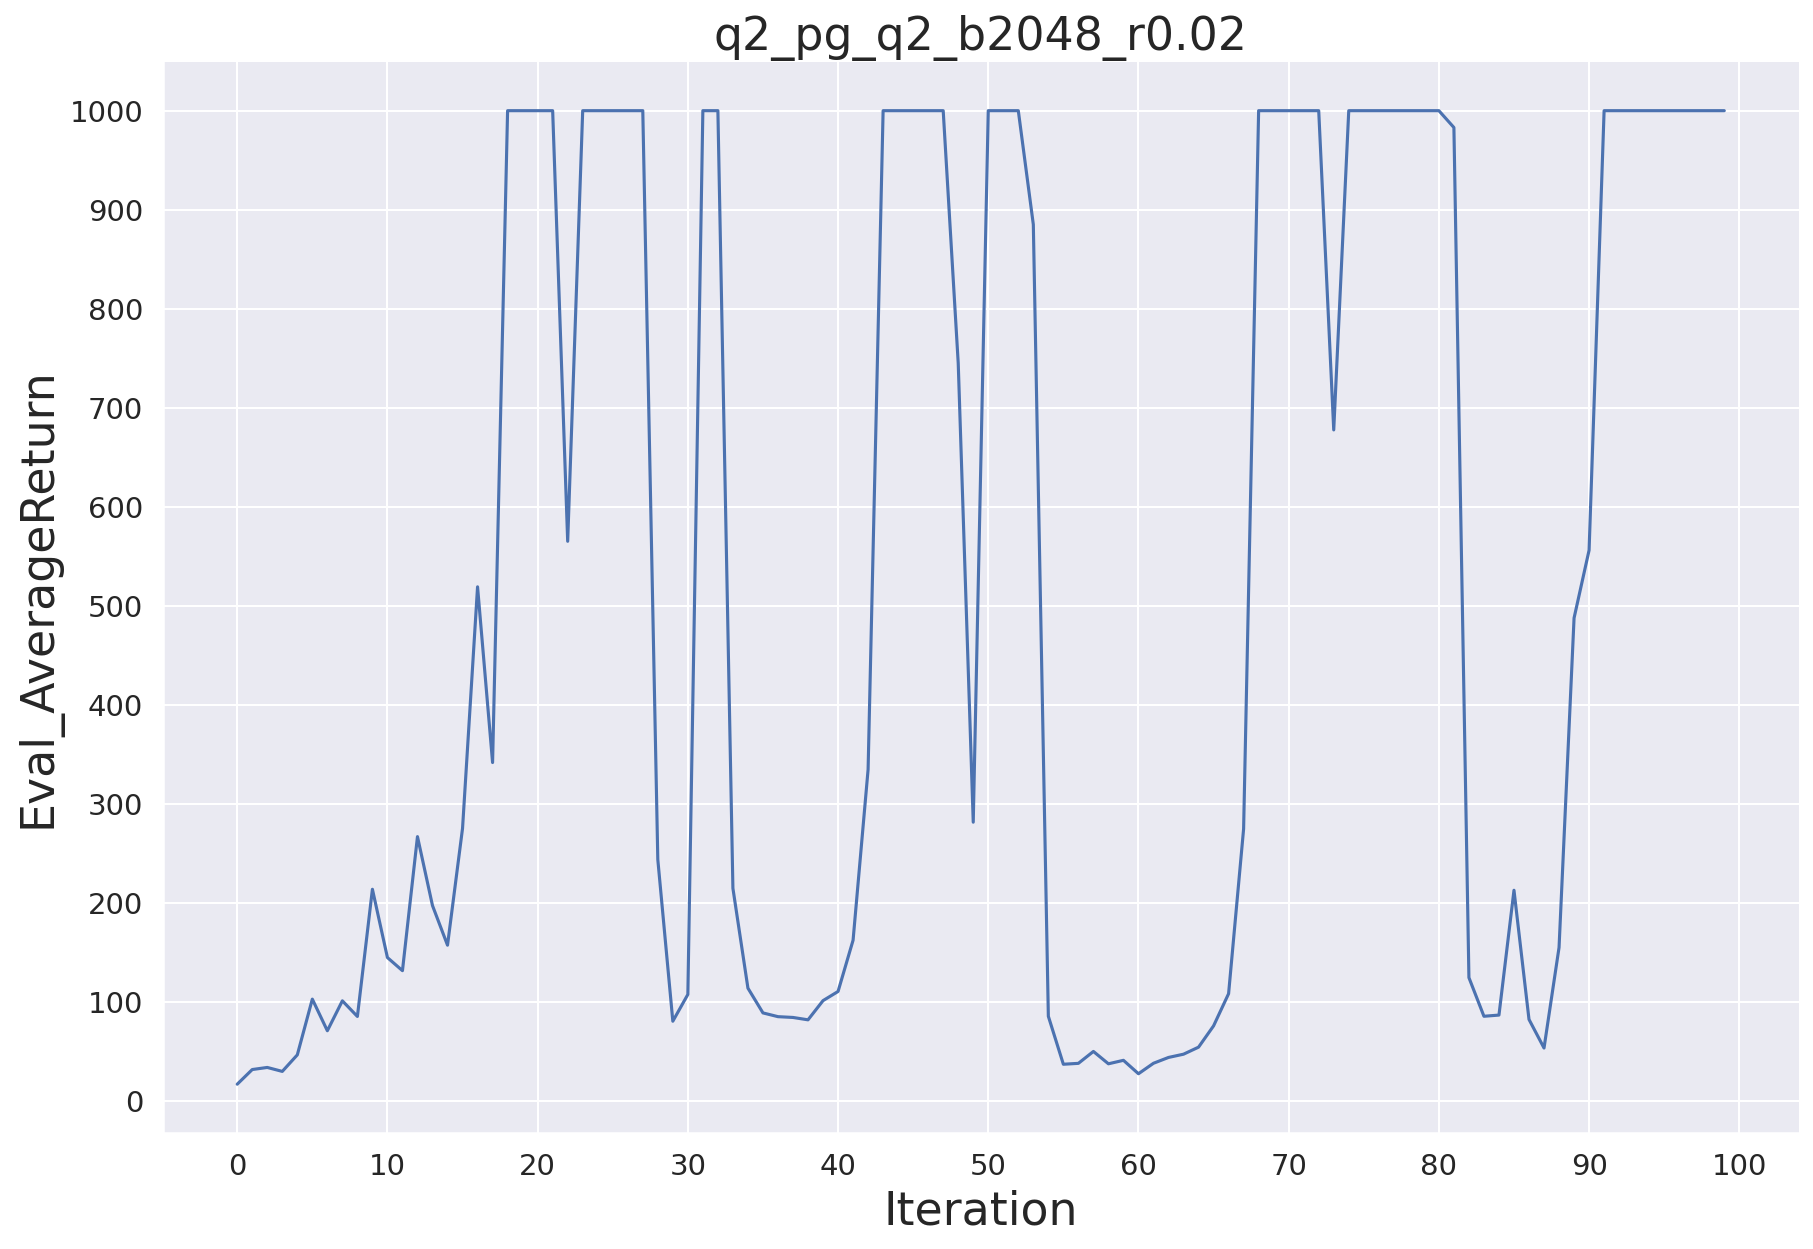

In [49]:
sns.relplot(
    data=df, x="Iteration", y="Eval_AverageReturn", 
    kind="line", height=8, aspect=1.5,
)
plt.xticks(np.arange(0, 110, 10), fontsize=14)
plt.yticks(np.arange(0, 1100, 100), fontsize=14)
plt.title(q2_model, fontsize=22)
plt.xlabel('Iteration', fontsize=22)
plt.ylabel('Eval_AverageReturn', fontsize=22)
plt.show()

## LunarLanderContinuous-v2 Experiment

In [50]:
exp_path = './data/'

In [51]:
experiment = 'q2_pg_q3_b40000_r0.005'

In [52]:
df = pd.read_csv(os.path.join(exp_path, experiment, 'progress.csv'))
df.head()

,Iteration,Eval_AverageReturn,Eval_StdReturn,Eval_MaxReturn,Eval_MinReturn,Eval_AverageEpLen,Train_AverageReturn,Train_StdReturn,Train_MaxReturn,Train_MinReturn,Train_AverageEpLen,Train_EnvstepsSoFar,TimeSinceStart,train_loss,baseline_loss,Initial_DataCollection_AverageReturn
0,0,-341.218660,114.071670,-224.228650,-512.88150,112.0,-312.67175,168.457260,62.252440,-754.64500,108.866848,40063,30.611379,-214.372200,1.006635,-312.67175
1,1,-165.000950,108.558460,-53.620888,-388.49484,72.5,-190.48700,120.311110,55.218964,-567.71780,100.818640,80088,59.320253,-142.499000,1.040708,-312.67175
2,2,-115.492065,19.173240,-91.752200,-141.28368,93.8,-145.11082,81.877960,58.736343,-440.44662,97.092233,120090,88.970801,-212.496830,1.002286,-312.67175
3,3,-86.297380,74.988270,34.407413,-193.45270,99.6,-125.70885,61.657650,98.900730,-461.59790,92.923434,160140,135.885679,22.312439,1.032014,-312.67175
4,4,-69.000580,51.435074,14.570648,-126.19125,88.8,-125.14297,61.754974,46.580257,-534.48706,90.216216,200196,189.387261,83.629330,1.057003,-312.67175


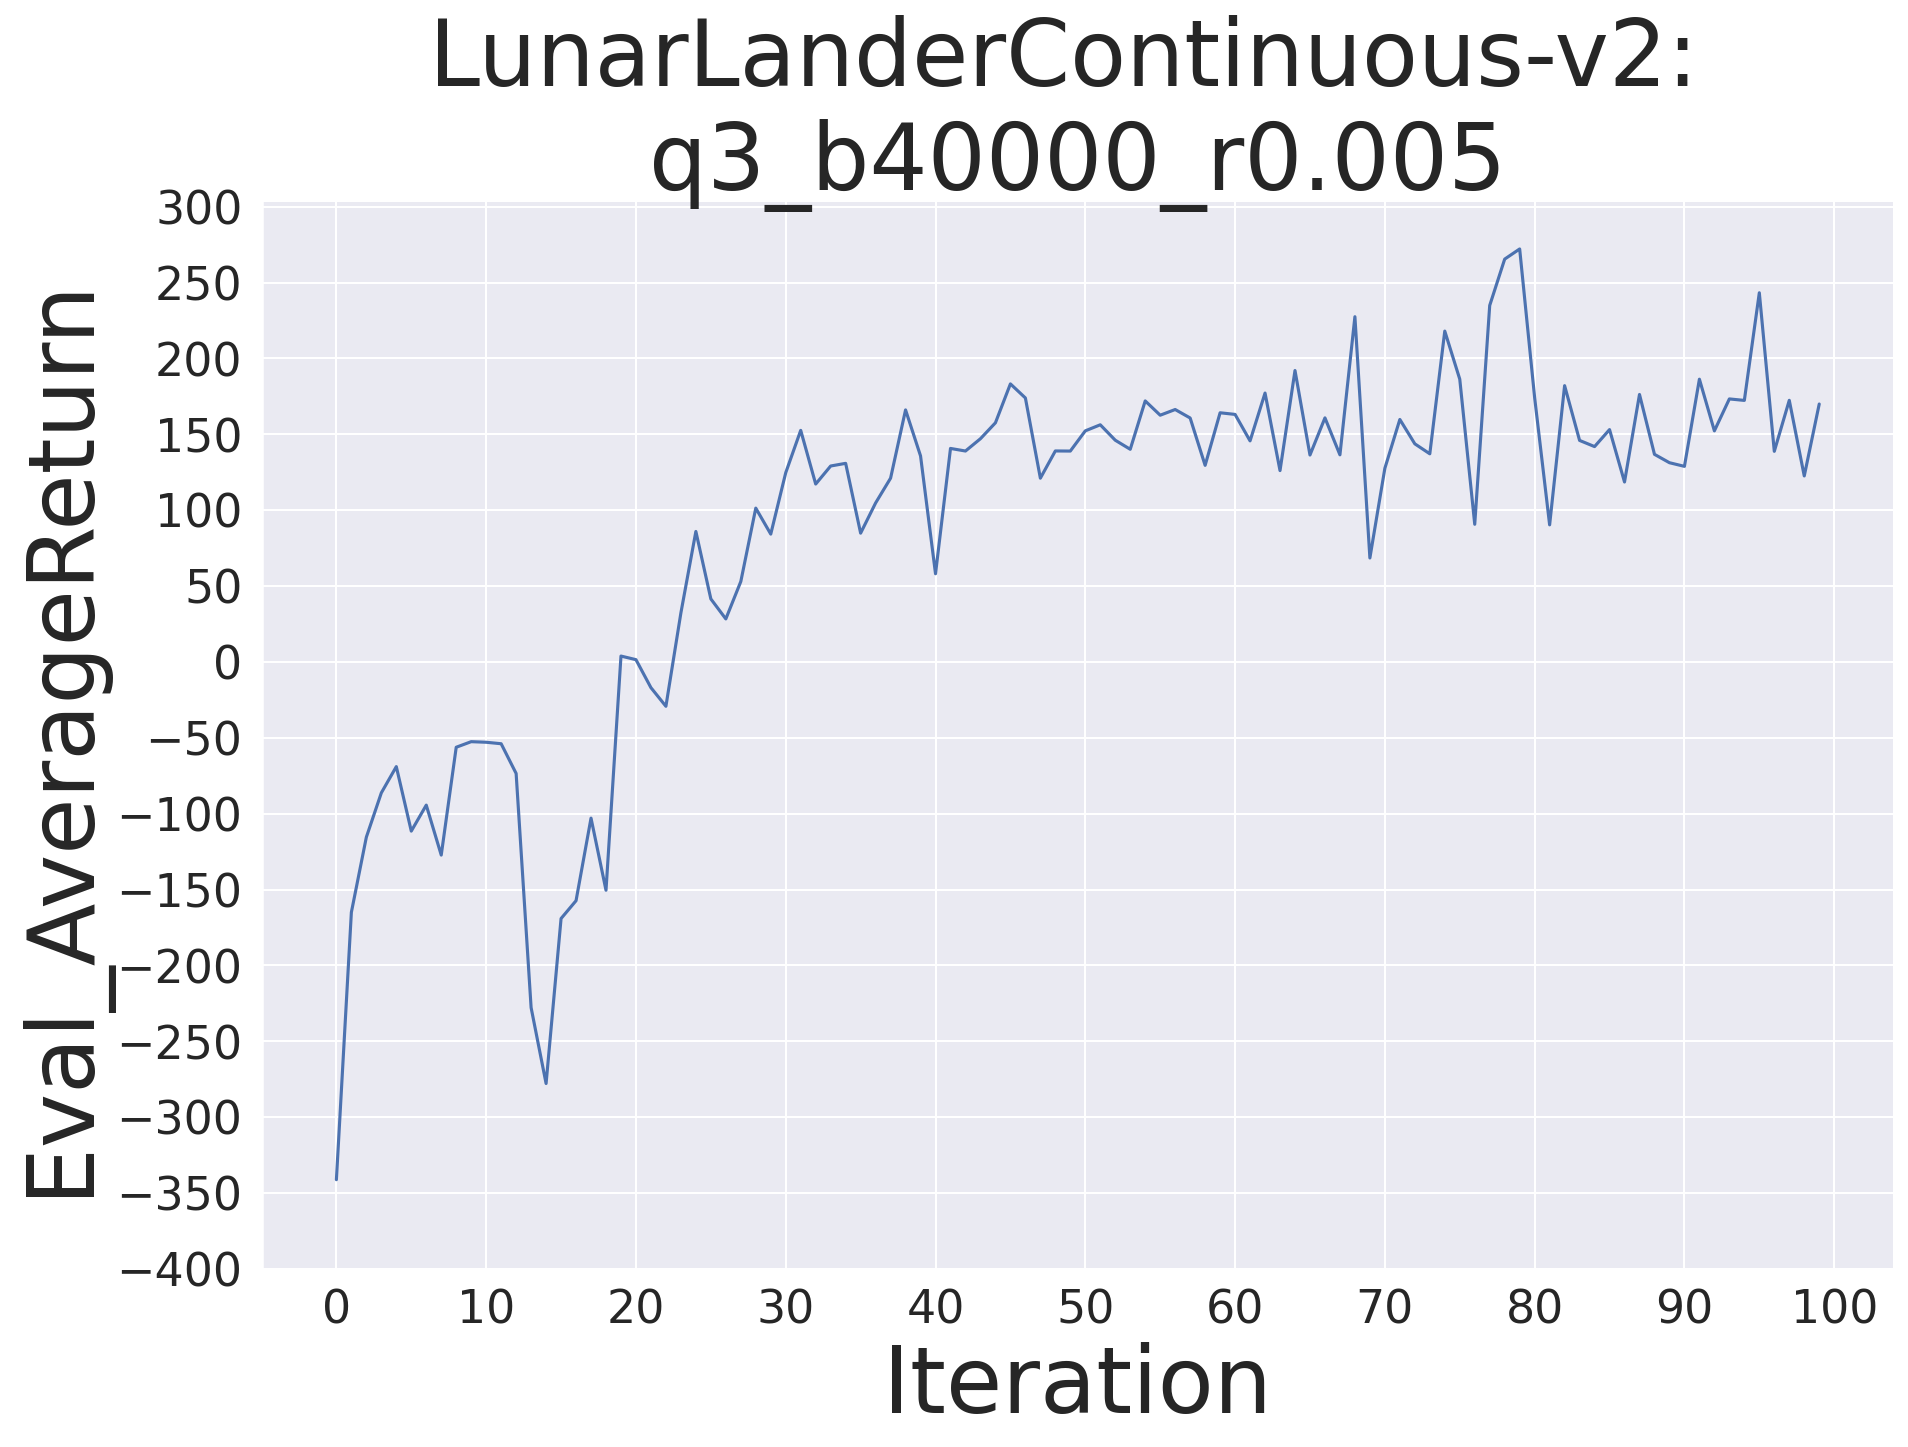

In [62]:
sns.relplot(
    data=df, x="Iteration", y="Eval_AverageReturn", 
    kind="line", height=8, aspect=1.5,
)
plt.xticks(np.arange(0, 110, 10), fontsize=22)
plt.yticks(np.arange(-400, 350, 50), fontsize=22)
plt.title("LunarLanderContinuous-v2: \nq3_b40000_r0.005", fontsize=44)
plt.xlabel('Iteration', fontsize=44)
plt.ylabel('Eval_AverageReturn', fontsize=44)
plt.show()

## HalfCheetah-v4 Experiment

In [194]:
exp_path = './data/'

In [195]:
experiments = [file for file in os.listdir('./data/') if file.startswith('q2_pg_q4_search')]

In [196]:
len(experiments)

9

In [197]:
import json

In [198]:
df = None
for experiment in experiments:
    new_df = pd.read_csv(os.path.join(exp_path, experiment, 'progress.csv'))
    params = json.load(open(os.path.join(exp_path, experiment, 'hyper-params.json'), 'rb'))
    
    new_df['batch_size'] = params['batch_size']
    new_df['learning_rate'] = params['learning_rate']
    
    if df is None:
        df = new_df.copy()
    else:
        df = pd.concat([df, new_df], axis=0)

/tmp/ipykernel_3057737/1219666257.py:1: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.lineplot(x='Iteration', y='Eval_AverageReturn', hue='batch_size',


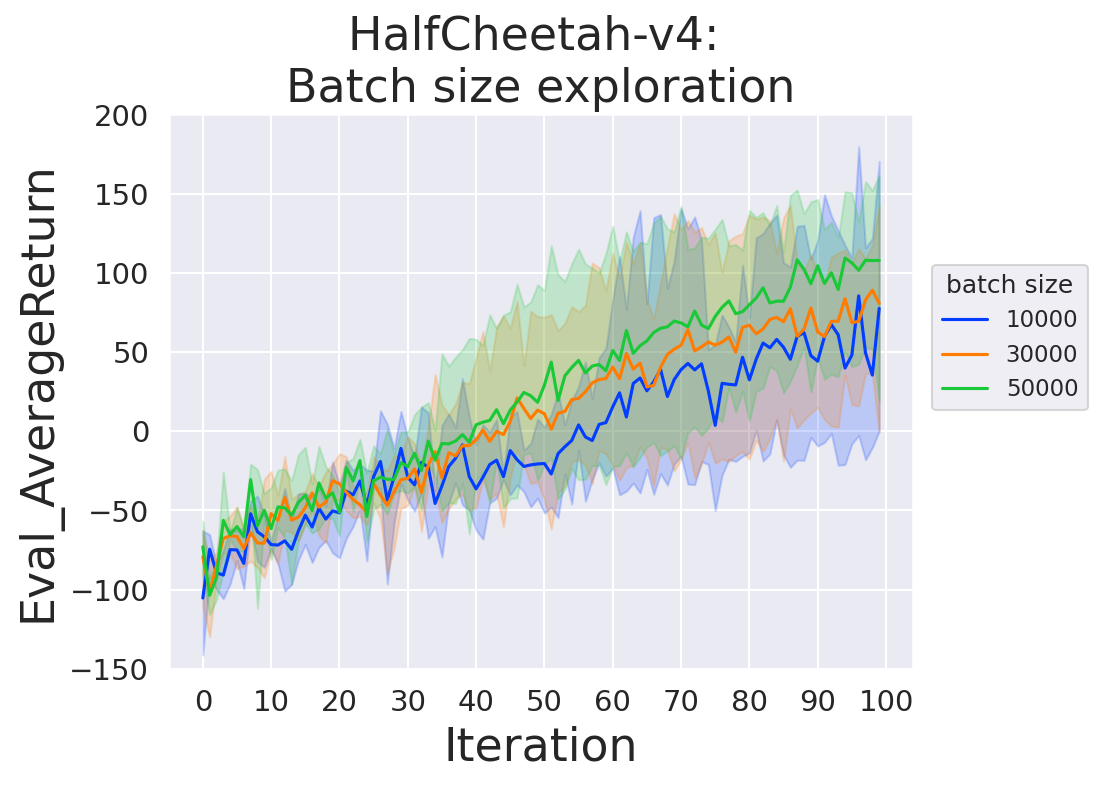

In [201]:
sns.lineplot(x='Iteration', y='Eval_AverageReturn', hue='batch_size', 
             data=df, palette=sns.color_palette("bright"),
             markers=True, dashes=False)
plt.ylim(0, 200)
plt.legend(bbox_to_anchor=(1.25, 0.75), title='batch size')
plt.xticks(np.arange(0, 110, 10), fontsize=14)
plt.yticks(np.arange(-150, 220, 50), fontsize=14)
plt.title("HalfCheetah-v4: \nBatch size exploration", fontsize=22)
plt.xlabel('Iteration', fontsize=22)
plt.ylabel('Eval_AverageReturn', fontsize=22)
plt.show()

/tmp/ipykernel_3057737/2166411238.py:1: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.lineplot(x='Iteration', y='Eval_AverageReturn', hue='learning_rate',


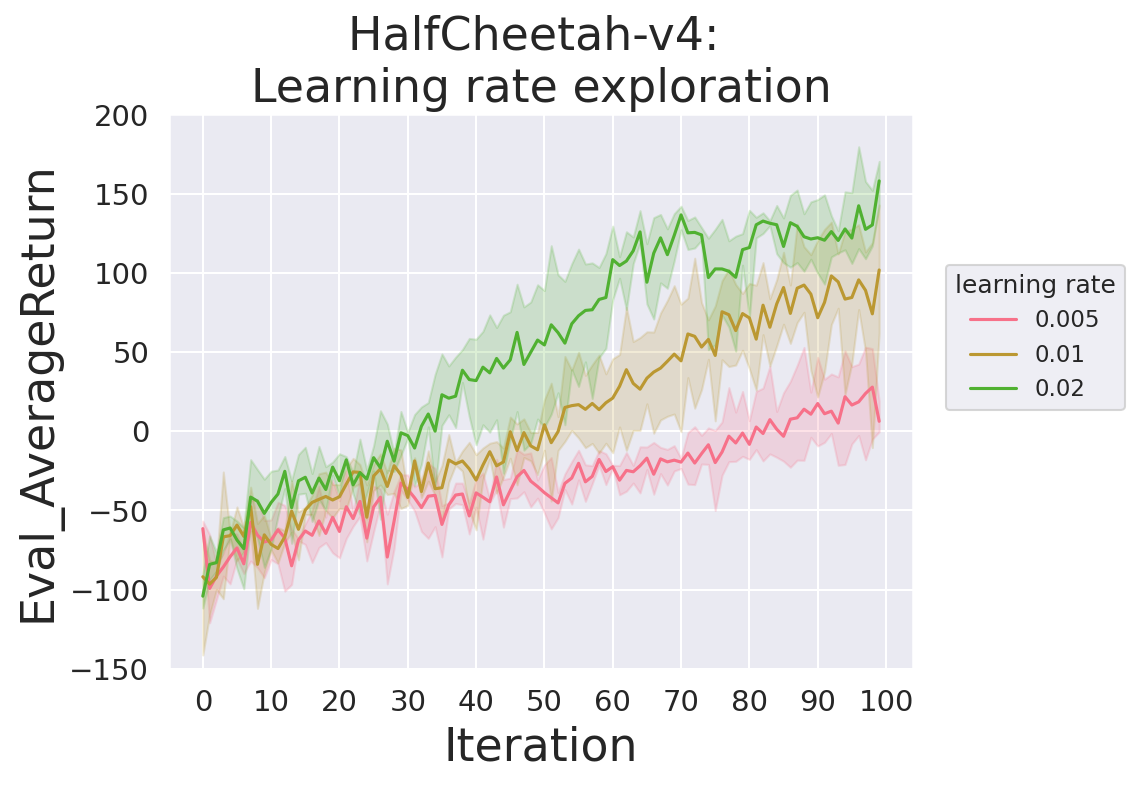

In [202]:
sns.lineplot(x='Iteration', y='Eval_AverageReturn', hue='learning_rate', 
             data=df, palette=sns.color_palette("husl"),
             markers=True, dashes=False)
plt.ylim(0, 200)
plt.legend(bbox_to_anchor=(1.30, 0.75), title='learning rate')
plt.xticks(np.arange(0, 110, 10), fontsize=14)
plt.yticks(np.arange(-150, 220, 50), fontsize=14)
plt.title("HalfCheetah-v4: \nLearning rate exploration", fontsize=22)
plt.xlabel('Iteration', fontsize=22)
plt.ylabel('Eval_AverageReturn', fontsize=22)
plt.show()

In [181]:
df['bs_lr'] = 'b' + df['batch_size'].astype(str) + '_' + 'r' + df['learning_rate'].astype(str)

/tmp/ipykernel_3057737/2512143967.py:2: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.lineplot(x='Iteration', y='Eval_AverageReturn', hue='bs_lr',


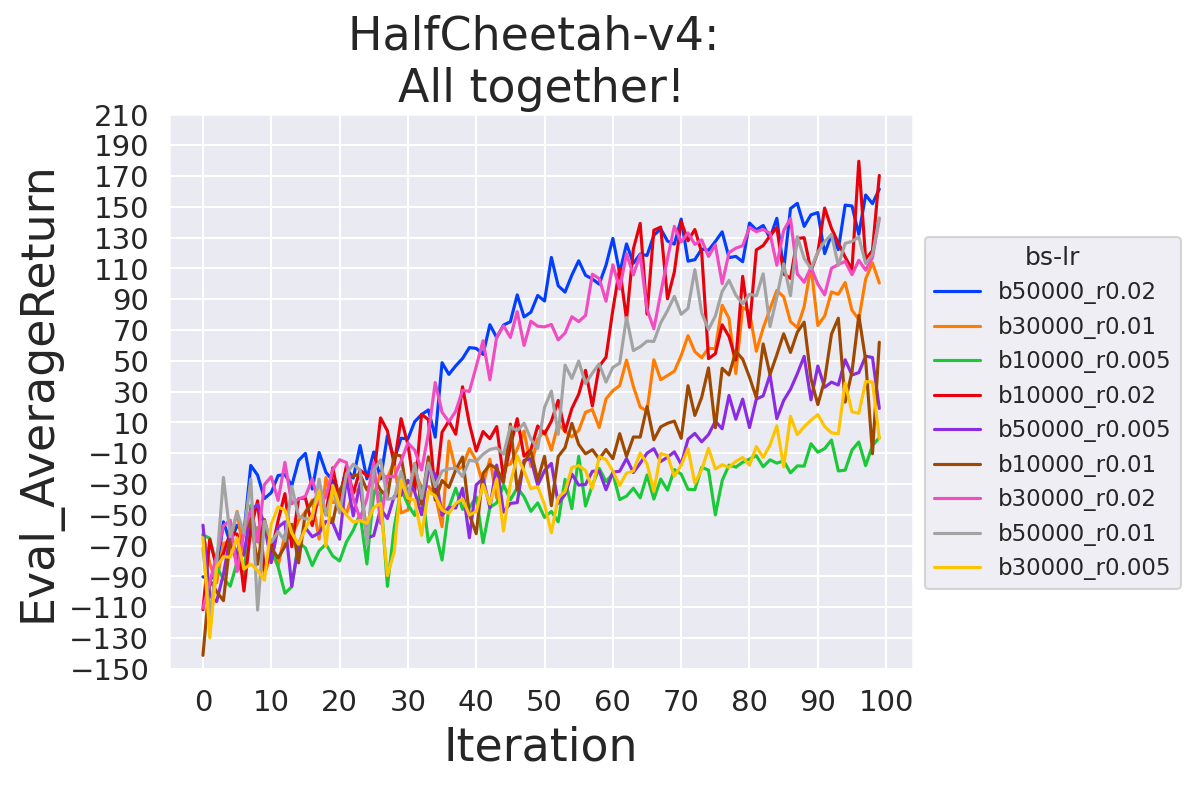

In [182]:
#### plt.figure(figsize=(10, 5))
sns.lineplot(x='Iteration', y='Eval_AverageReturn', hue='bs_lr', 
             data=df, palette=sns.color_palette("bright"),
             markers=True, dashes=False)
plt.ylim(0, 200)
plt.legend(bbox_to_anchor=(1.0, 0.8), title='bs-lr')
plt.xticks(np.arange(0, 110, 10), fontsize=14)
plt.yticks(np.arange(-150, 220, 20), fontsize=14)
plt.title("HalfCheetah-v4: \nAll together!", fontsize=22)
plt.xlabel('Iteration', fontsize=22)
plt.ylabel('Eval_AverageReturn', fontsize=22)
plt.show()

In [184]:
exp_path = './data/'

In [185]:
experiments = experiments = [file for file in os.listdir(exp_path) if file.startswith('q2_pg_q4_b')]

In [186]:
len(experiments)

4

In [187]:
experiments

['q2_pg_q4_b50000_r0.02_rtg',
 'q2_pg_q4_b50000_r0.02_nnbaseline',
 'q2_pg_q4_b50000_r0.02_rtg_nnbaseline',
 'q2_pg_q4_b50000_r0.02']

In [188]:
df = None
for experiment in experiments:
    new_df = pd.read_csv(os.path.join(exp_path, experiment, 'progress.csv'))
    new_df['nn_baseline'] = 'nnbaseline' if 'nnbaseline' in experiment else 'no_nnbaseline'
    new_df['rtg'] = 'w_rtg' if 'rtg' in experiment else 'no_rtg'
    
    if df is None:
        df = new_df.copy()
    else:
        df = pd.concat([df, new_df], axis=0)

In [189]:
df['nn_rtg'] = df['nn_baseline'] + ',' +  df['rtg']

In [190]:
df['nn_rtg'].value_counts()

no_nnbaseline,w_rtg     100
nnbaseline,no_rtg       100
nnbaseline,w_rtg        100
no_nnbaseline,no_rtg    100
Name: nn_rtg, dtype: int64

/tmp/ipykernel_3057737/782717635.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(x='Iteration', y='Eval_AverageReturn', hue='nn_rtg',


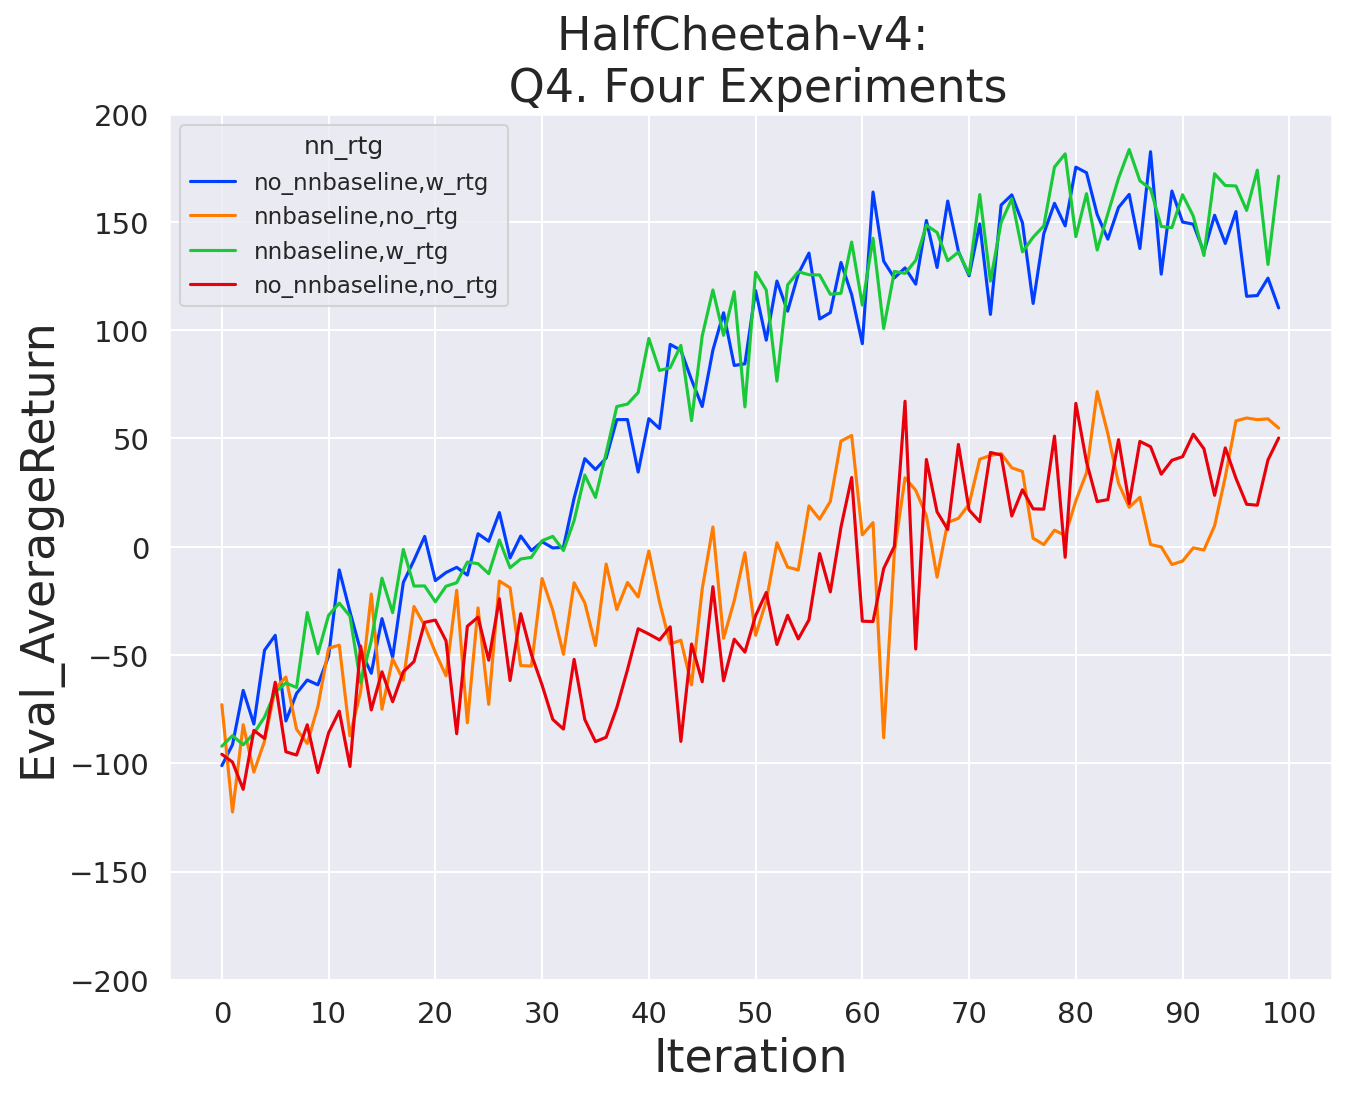

In [193]:
plt.figure(figsize=(10, 7.5))
sns.lineplot(x='Iteration', y='Eval_AverageReturn', hue='nn_rtg', 
             data=df, palette=sns.color_palette("bright"),
             markers=True, dashes=False, legend=True)
plt.legend(title='nn_rtg')
plt.xticks(np.arange(0, 110, 10), fontsize=14)
plt.yticks(np.arange(-200, 220, 50), fontsize=14)
plt.title("HalfCheetah-v4: \n Q4. Four Experiments", fontsize=22)
plt.xlabel('Iteration', fontsize=22)
plt.ylabel('Eval_AverageReturn', fontsize=22)
plt.show()

## Hopper Experiment

In [155]:
exp_path = './data/'

In [156]:
experiments = [
    'q2_pg_q5_b2000_r0.001_lambda1.0',
    'q2_pg_q5_b2000_r0.001_lambda0.99',
    'q2_pg_q5_b2000_r0.001_lambda0.98',
    'q2_pg_q5_b2000_r0.001_lambda0.95',
    'q2_pg_q5_b2000_r0.001_lambda0.0',
]

In [157]:
df = None
for experiment in experiments:
    new_df = pd.read_csv(os.path.join(exp_path, experiment, 'progress.csv'))
    new_df['id'] = experiment
    new_df['lambda'] = float(experiment.split('lambda')[1])
    
    if df is None:
        df = new_df.copy()
    else:
        df = pd.concat([df, new_df], axis=0)

In [158]:
df.head()

,Iteration,Eval_AverageReturn,Eval_StdReturn,Eval_MaxReturn,Eval_MinReturn,Eval_AverageEpLen,Train_AverageReturn,Train_StdReturn,Train_MaxReturn,Train_MinReturn,Train_AverageEpLen,Train_EnvstepsSoFar,TimeSinceStart,train_loss,baseline_loss,Initial_DataCollection_AverageReturn,id,lambda
0,0,10.102911,6.657010,40.897026,4.383373,14.206897,9.932523,5.628964,53.871240,3.487607,13.903448,2016,3.991400,0.020674,1.148696,9.932523,q2_pg_q5_b2000_r0.001_lambda1.0,1.0
1,1,9.912375,4.335058,19.459590,3.748826,13.433333,11.452476,8.122088,65.336266,3.231279,15.280303,4033,7.145549,-0.019197,1.119547,9.932523,q2_pg_q5_b2000_r0.001_lambda1.0,1.0
2,2,12.766464,9.693642,43.495304,4.510944,15.576923,11.335903,7.301852,68.880714,4.579197,15.007463,6044,10.310204,-0.008321,1.093416,9.932523,q2_pg_q5_b2000_r0.001_lambda1.0,1.0
3,3,11.621324,7.463714,45.381332,3.905041,15.769231,12.561500,9.853523,86.247070,4.395760,15.703125,8054,13.456814,0.021976,1.082777,9.932523,q2_pg_q5_b2000_r0.001_lambda1.0,1.0
4,4,17.745985,18.896164,97.131775,4.241942,19.142857,12.237928,8.936586,67.565530,4.743463,15.453846,10063,16.626301,0.020784,1.049394,9.932523,q2_pg_q5_b2000_r0.001_lambda1.0,1.0


/tmp/ipykernel_3057737/922390485.py:1: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(x='Iteration', y='Eval_AverageReturn', hue='lambda',


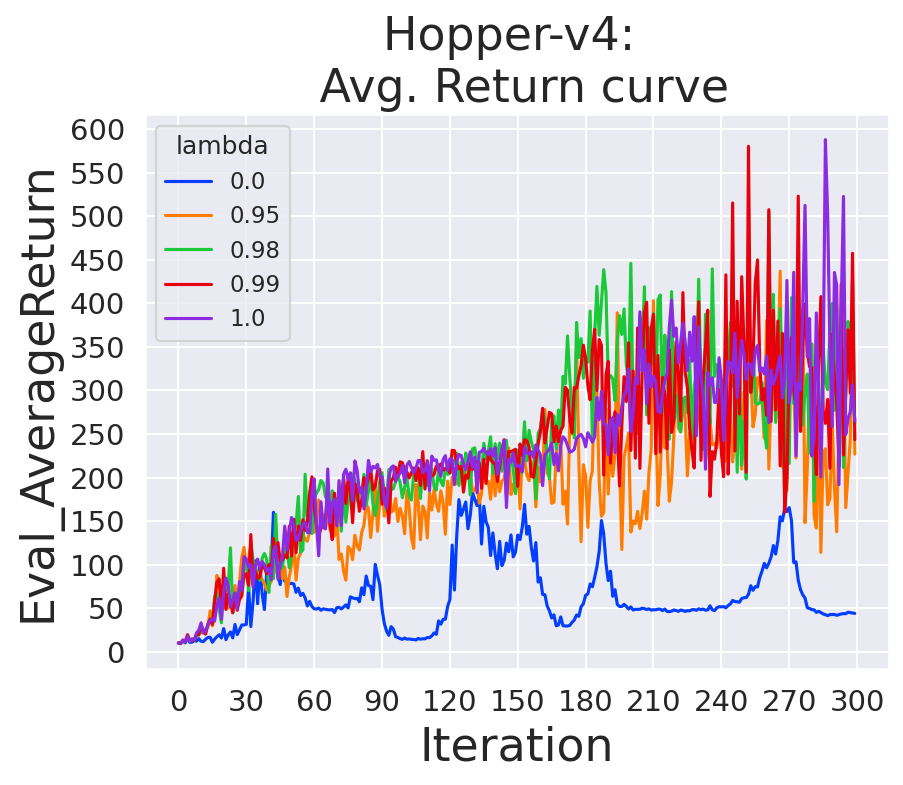

In [139]:
sns.lineplot(x='Iteration', y='Eval_AverageReturn', hue='lambda', 
             data=df, palette=sns.color_palette("bright"),
             markers=True, dashes=False)
# plt.ylim(0, 400)
plt.xticks(np.arange(0, 330, 30), fontsize=14)
plt.yticks(np.arange(0, 625, 50), fontsize=14)
plt.title("Hopper-v4: \n Avg. Return curve", fontsize=22)
plt.xlabel('Iteration', fontsize=22)
plt.ylabel('Eval_AverageReturn', fontsize=22)
plt.show()

In [160]:
df

,Iteration,Eval_AverageReturn,Eval_StdReturn,Eval_MaxReturn,Eval_MinReturn,Eval_AverageEpLen,Train_AverageReturn,Train_StdReturn,Train_MaxReturn,Train_MinReturn,Train_AverageEpLen,Train_EnvstepsSoFar,TimeSinceStart,train_loss,baseline_loss,Initial_DataCollection_AverageReturn,id,lambda
0,0,10.102911,6.657010,40.897026,4.383373,14.206897,9.932523,5.628964,53.871240,3.487607,13.903448,2016,3.991400,0.020674,1.148696,9.932523,q2_pg_q5_b2000_r0.001_lambda1.0,1.0
1,1,9.912375,4.335058,19.459590,3.748826,13.433333,11.452476,8.122088,65.336266,3.231279,15.280303,4033,7.145549,-0.019197,1.119547,9.932523,q2_pg_q5_b2000_r0.001_lambda1.0,1.0
2,2,12.766464,9.693642,43.495304,4.510944,15.576923,11.335903,7.301852,68.880714,4.579197,15.007463,6044,10.310204,-0.008321,1.093416,9.932523,q2_pg_q5_b2000_r0.001_lambda1.0,1.0
3,3,11.621324,7.463714,45.381332,3.905041,15.769231,12.561500,9.853523,86.247070,4.395760,15.703125,8054,13.456814,0.021976,1.082777,9.932523,q2_pg_q5_b2000_r0.001_lambda1.0,1.0
4,4,17.745985,18.896164,97.131775,4.241942,19.142857,12.237928,8.936586,67.565530,4.743463,15.453846,10063,16.626301,0.020784,1.049394,9.932523,q2_pg_q5_b2000_r0.001_lambda1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,43.541200,1.775653,47.212265,39.859110,28.000000,43.667564,3.029206,50.744072,36.533424,27.972222,598198,1470.820734,0.001687,0.208154,9.932523,q2_pg_q5_b2000_r0.001_lambda0.0,0.0
296,296,45.297676,4.267789,53.860504,39.559820,28.857143,43.636170,3.208516,51.133064,38.181040,27.944444,600210,1473.975483,0.009860,0.212570,9.932523,q2_pg_q5_b2000_r0.001_lambda0.0,0.0
297,297,44.844036,2.364884,48.967390,40.764656,28.600000,43.404110,2.958493,53.851040,38.857070,27.902778,602219,1477.155186,0.006590,0.215365,9.932523,q2_pg_q5_b2000_r0.001_lambda0.0,0.0
298,298,44.271767,3.487964,53.789910,39.136658,28.333333,43.647490,2.900579,49.923540,37.600502,27.958333,604232,1480.343909,-0.078513,0.214689,9.932523,q2_pg_q5_b2000_r0.001_lambda0.0,0.0


/tmp/ipykernel_3057737/2626032526.py:1: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(x='Iteration', y='Eval_StdReturn', hue='lambda',


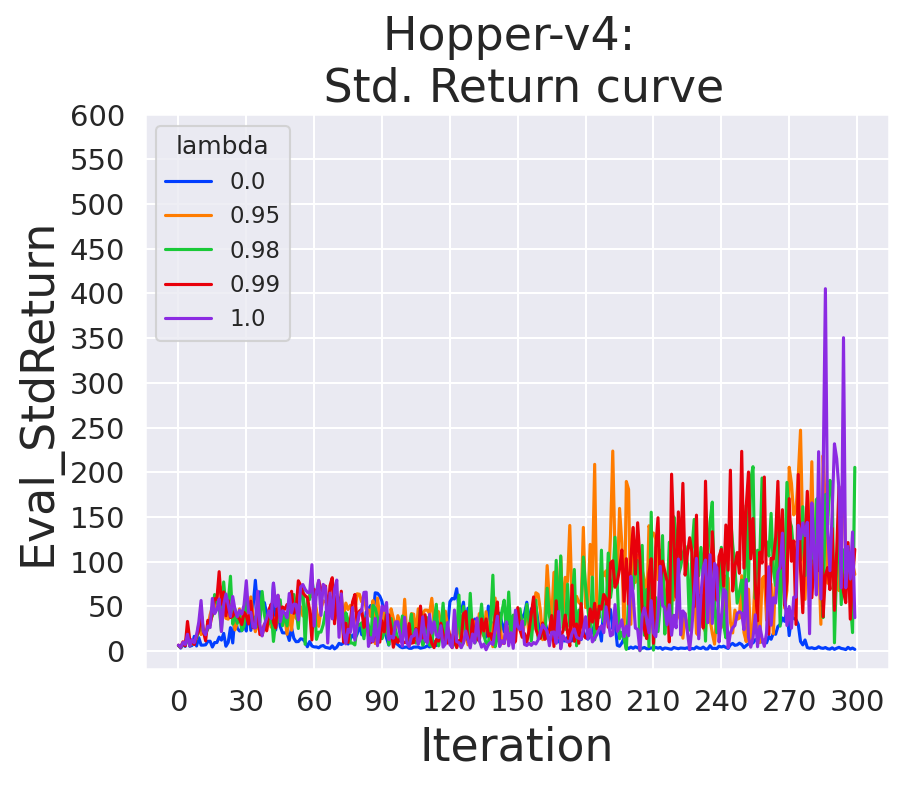

In [161]:
sns.lineplot(x='Iteration', y='Eval_StdReturn', hue='lambda', 
             data=df, palette=sns.color_palette("bright"),
             markers=True, dashes=False)
# plt.ylim(0, 400)
plt.xticks(np.arange(0, 330, 30), fontsize=14)
plt.yticks(np.arange(0, 625, 50), fontsize=14)
plt.title("Hopper-v4: \n Std. Return curve", fontsize=22)
plt.xlabel('Iteration', fontsize=22)
plt.ylabel('Eval_StdReturn', fontsize=22)
plt.show()

In [138]:
final_df = df[df['Iteration'] > 297].groupby(['id']).mean().sort_values(by='Eval_AverageReturn', ascending=False)
final_df.head()

,Iteration,Eval_AverageReturn,Eval_StdReturn,Eval_MaxReturn,Eval_MinReturn,Eval_AverageEpLen,Train_AverageReturn,Train_StdReturn,Train_MaxReturn,Train_MinReturn,Train_AverageEpLen,Train_EnvstepsSoFar,TimeSinceStart,train_loss,baseline_loss,Initial_DataCollection_AverageReturn,lambda
id,,,,,,,,,,,,,,,,,
q2_pg_q5_b2000_r0.001_lambda0.99,298.5,350.54206,96.977435,460.223020,227.849280,138.333333,268.961855,134.697190,516.373915,96.659795,115.560372,617265.5,1275.839892,-0.005104,0.971224,9.932523,0.99
q2_pg_q5_b2000_r0.001_lambda0.95,298.5,326.78313,92.561600,458.010330,231.378260,143.458333,255.595905,137.087390,500.937500,93.591825,114.273529,614488.0,1518.913764,-0.050010,0.895402,9.932523,0.95
q2_pg_q5_b2000_r0.001_lambda1.0,298.5,285.67500,85.357865,355.714720,165.931805,161.166667,320.533750,159.642105,681.181550,120.018865,172.830128,617064.0,1517.305869,0.013872,0.981798,9.932523,1.00
q2_pg_q5_b2000_r0.001_lambda0.98,298.5,281.55597,113.100160,463.524200,171.348547,132.083333,349.208450,151.579290,702.289450,138.081655,139.400452,616964.5,1525.642451,-0.020033,0.853186,9.932523,0.98
q2_pg_q5_b2000_r0.001_lambda0.0,298.5,44.13439,2.733019,50.965325,39.880066,28.366667,44.075295,2.958244,51.485088,37.950981,28.218603,605243.0,1481.950753,-0.044900,0.209972,9.932523,0.00


/tmp/ipykernel_3057737/2826561890.py:1: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(x='Iteration', y='train_loss', hue='lambda',


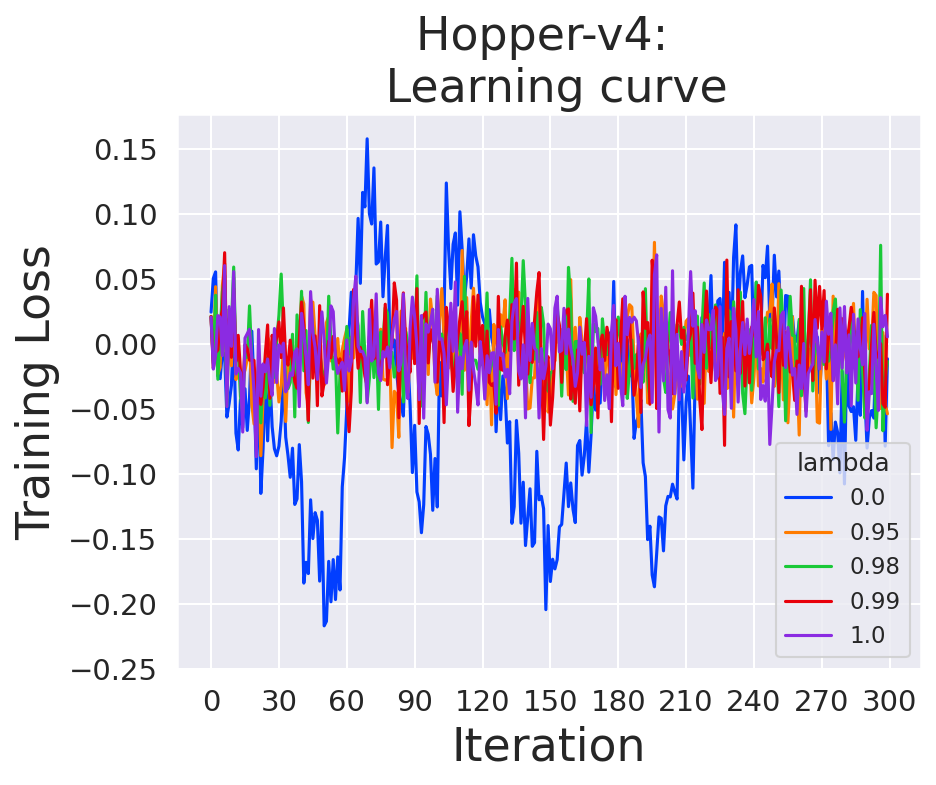

In [141]:
sns.lineplot(x='Iteration', y='train_loss', hue='lambda', 
             data=df, palette=sns.color_palette("bright"),
             markers=True, dashes=False)
plt.xticks(np.arange(0, 330, 30), fontsize=14)
plt.yticks(np.arange(-0.25, 0.20, 0.05), fontsize=14)
plt.title("Hopper-v4: \n Learning curve", fontsize=22)
plt.xlabel('Iteration', fontsize=22)
plt.ylabel('Training Loss', fontsize=22)
plt.show()